Creating sample data for demonstration...
EXPLORATORY DATA ANALYSIS
Dataset Shape: (1000, 5)

First 5 rows:
   Age   Area Income  Daily Time Spent on Site  Daily Internet Usage  \
0   56  65094.392138                 47.451247            117.714131   
1   46  41346.621957                 21.916067            182.746706   
2   32  62535.381681                 64.587276            144.521007   
3   60  33054.397180                 91.583774            117.074754   
4   25  57947.062669                 89.918888            169.149147   

   Clicked on Ad  
0              0  
1              0  
2              1  
3              0  
4              0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   int32  
 1   Area Income               1000 non-null   float64
 2   

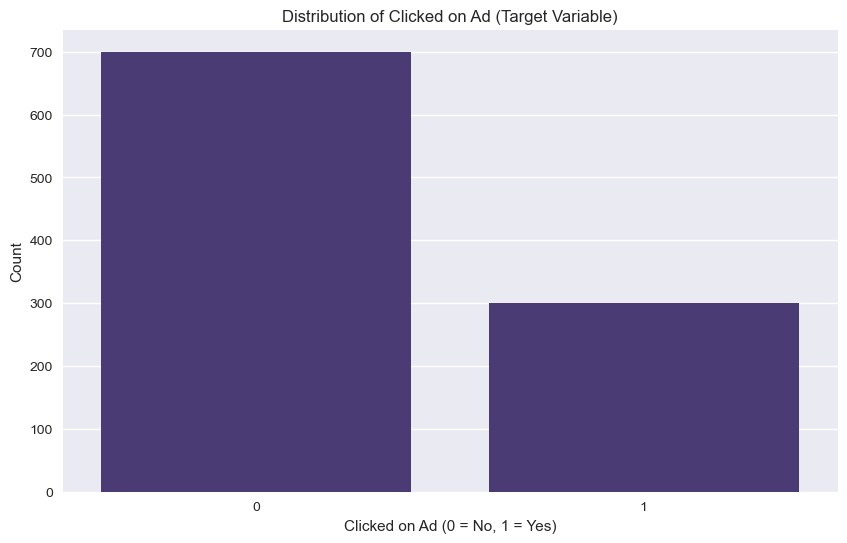

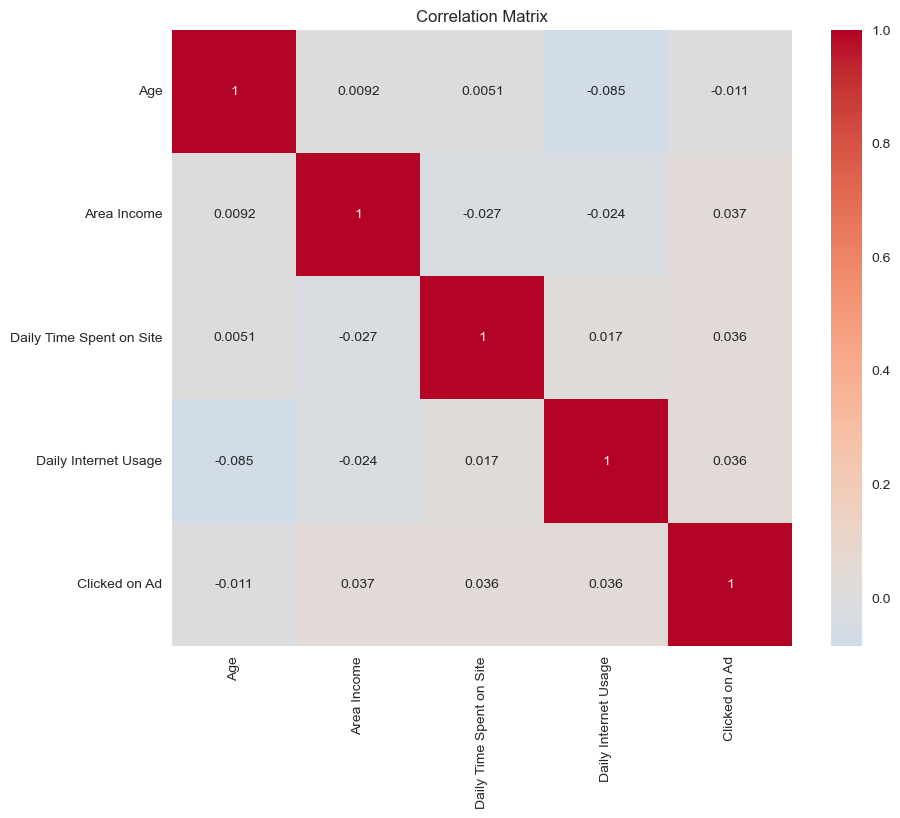

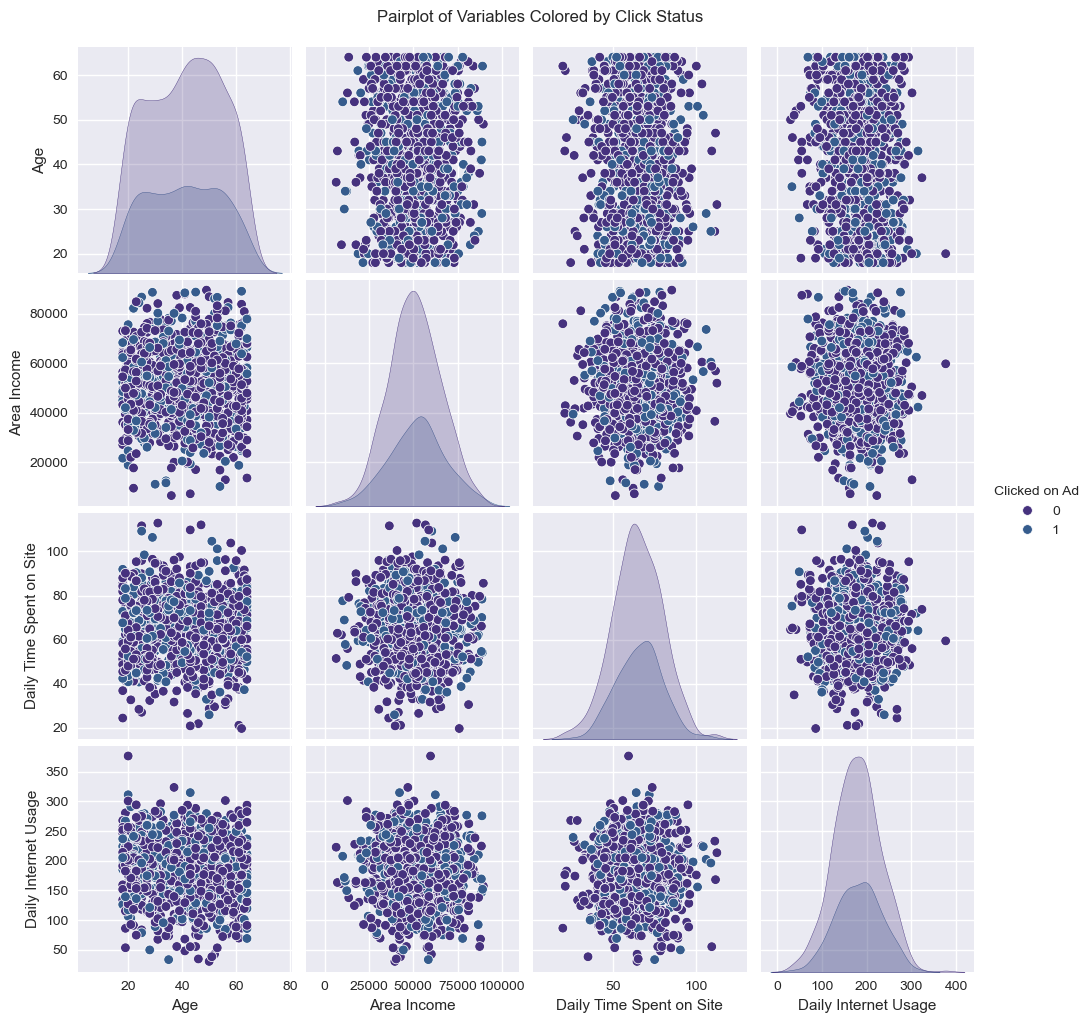


DATA PREPROCESSING
Training set size: 700
Testing set size: 300
Percentage of clicks in training set: 30.00%
Percentage of clicks in testing set: 30.00%

MODEL TRAINING

MODEL EVALUATION
Accuracy: 0.7000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Cross-Validation Accuracy Scores: [0.7 0.7 0.7 0.7 0.7]
Mean CV Accuracy: 0.7000 (+/- 0.0000)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       210
           1       0.00      0.00      0.00        90

    accuracy                           0.70       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.49      0.70      0.58       300



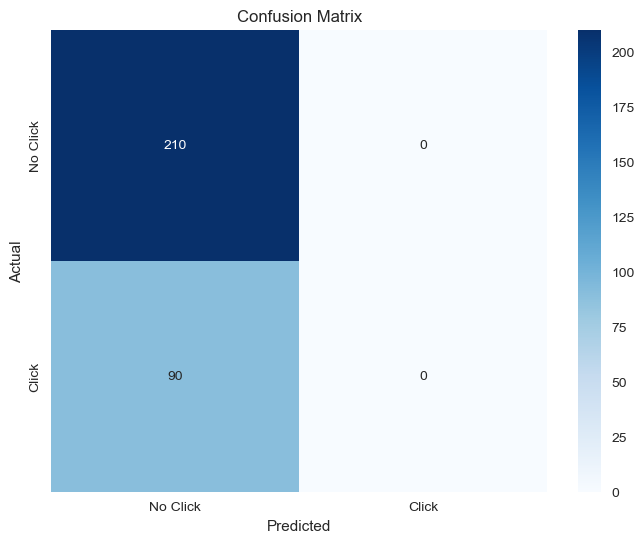

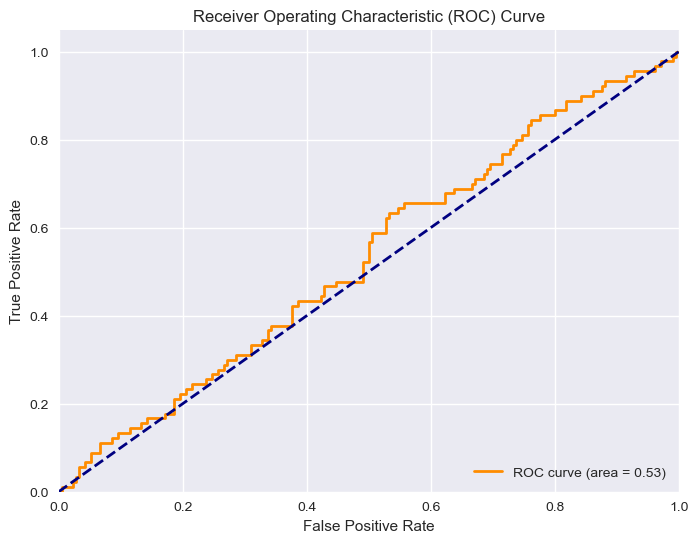

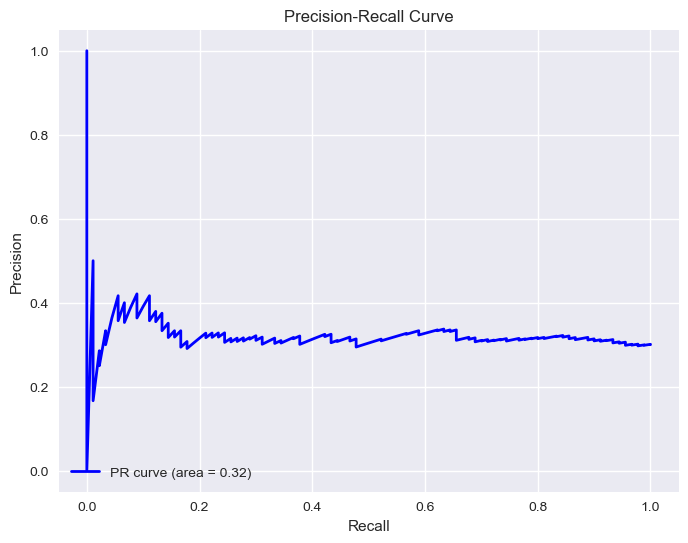


Feature Importance (by coefficient magnitude):
                    Feature  Coefficient  Absolute_Coefficient
2  Daily Time Spent on Site     0.097664              0.097664
3      Daily Internet Usage     0.080405              0.080405
1               Area Income     0.069880              0.069880
0                       Age    -0.022601              0.022601


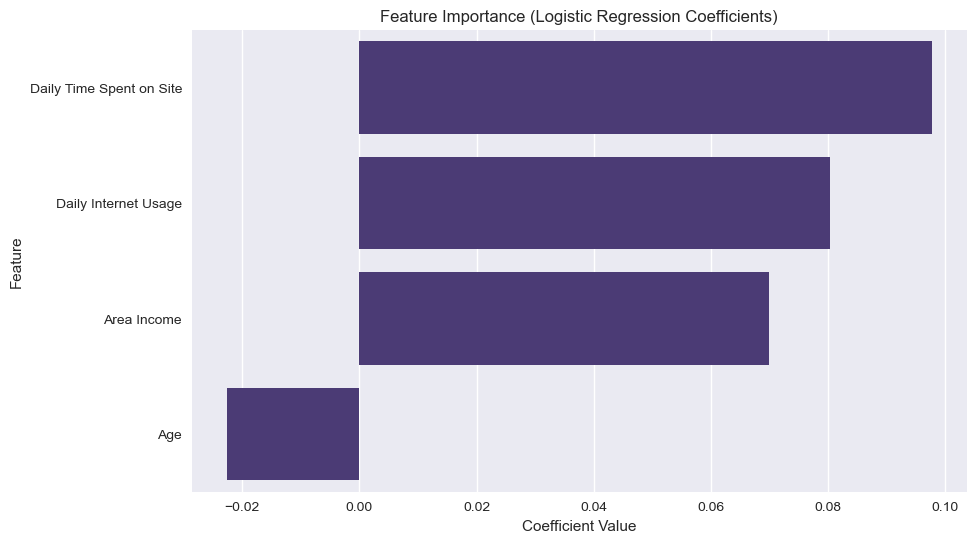


BUSINESS IMPACT ANALYSIS
Baseline CTR (without targeting): 30.00%
Predicted CTR for top 20% most likely users: 31.67%
Potential CTR improvement by targeting top 20%: 5.56%

Cost without model (show ads to all): 300
Cost with model (show ads only to predicted clickers): 0
Cost reduction: 100.00%
Clicks captured with model: 0/90 (0.00%)

Model saved as 'ctr_prediction_model.pkl'

EXAMPLE PREDICTION
Example user features:
   Age  Area Income  Daily Time Spent on Site  Daily Internet Usage
0   35        60000                        75                   200
Predicted probability of clicking: 0.3316
Predicted class: No Click

PROJECT CONCLUSION
The logistic regression model has been successfully developed and evaluated.
Key insights:
1. Model accuracy: 70.00%
2. Precision: 0.00% - Of all predicted clicks, 0.00% actually clicked
3. Recall: 0.00% - The model identified 0.00% of all actual clicks
4. Potential CTR improvement by targeting top 20%: 5.56%
5. Potential cost reduction: 100.00%

Thi

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, auc, precision_recall_curve)
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# Load the dataset
# Note: You'll need to replace 'advertising_data.csv' with your actual file path
try:
    df = pd.read_csv('advertising_data.csv')
    print("Dataset loaded successfully!")
except:
    # Create sample data if file not found
    print("Creating sample data for demonstration...")
    np.random.seed(42)
    n_samples = 1000

    data = {
        'Age': np.random.randint(18, 65, n_samples),
        'Area Income': np.random.normal(50000, 15000, n_samples),
        'Daily Time Spent on Site': np.random.normal(65, 15, n_samples),
        'Daily Internet Usage': np.random.normal(180, 50, n_samples),
        'Clicked on Ad': np.random.choice([0, 1], n_samples, p=[0.7, 0.3])
    }
    df = pd.DataFrame(data)

# Exploratory Data Analysis
print("="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Display basic information about the dataset
print(f"Dataset Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Clicked on Ad', data=df)
plt.title('Distribution of Clicked on Ad (Target Variable)')
plt.xlabel('Clicked on Ad (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Pairplot to visualize relationships between variables
sns.pairplot(df, hue='Clicked on Ad', diag_kind='kde')
plt.suptitle('Pairplot of Variables Colored by Click Status', y=1.02)
plt.show()

# Data Preprocessing
print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

# Separate features and target variable
X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Percentage of clicks in training set: {y_train.mean():.2%}")
print(f"Percentage of clicks in testing set: {y_test.mean():.2%}")

# Model Training
print("\n" + "="*50)
print("MODEL TRAINING")
print("="*50)

# Initialize and train the logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Model Evaluation
print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Cross-validation scores
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Click', 'Click'],
            yticklabels=['No Click', 'Click'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall_vals, precision_vals)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0],
    'Absolute_Coefficient': np.abs(logreg.coef_[0])
}).sort_values('Absolute_Coefficient', ascending=False)

print("\nFeature Importance (by coefficient magnitude):")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.sort_values('Coefficient', ascending=False))
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()

# Business Impact Analysis
print("\n" + "="*50)
print("BUSINESS IMPACT ANALYSIS")
print("="*50)

# Calculate baseline CTR (without model)
baseline_ctr = y.mean()
print(f"Baseline CTR (without targeting): {baseline_ctr:.2%}")

# Calculate predicted CTR for top 20% most likely users
threshold = np.percentile(y_pred_proba, 80)
top_20_percent = y_test[y_pred_proba >= threshold]
predicted_ctr_top_20 = top_20_percent.mean() if len(top_20_percent) > 0 else 0

print(f"Predicted CTR for top 20% most likely users: {predicted_ctr_top_20:.2%}")

# Calculate potential improvement
improvement = (predicted_ctr_top_20 - baseline_ctr) / baseline_ctr
print(f"Potential CTR improvement by targeting top 20%: {improvement:.2%}")

# Calculate cost savings (assuming fixed budget)
# Example: If we only show ads to predicted clickers, we can reduce ad spend while maintaining clicks
total_users = len(y_test)
clickers = y_test.sum()
non_clickers = total_users - clickers

# Without model: show ads to all users
cost_without_model = total_users  # assuming cost per impression is 1

# With model: only show ads to predicted clickers
predicted_clickers = (y_pred == 1).sum()
cost_with_model = predicted_clickers  # only show ads to predicted clickers

# Actual clicks captured
actual_clicks_captured = ((y_pred == 1) & (y_test == 1)).sum()

print(f"\nCost without model (show ads to all): {cost_without_model}")
print(f"Cost with model (show ads only to predicted clickers): {cost_with_model}")
print(f"Cost reduction: {(cost_without_model - cost_with_model) / cost_without_model:.2%}")
print(f"Clicks captured with model: {actual_clicks_captured}/{clickers} ({actual_clicks_captured/clickers:.2%})")

# Save the model for future use
import joblib
model_data = {
    'model': logreg,
    'scaler': scaler,
    'features': X.columns.tolist()
}
joblib.dump(model_data, 'ctr_prediction_model.pkl')
print("\nModel saved as 'ctr_prediction_model.pkl'")

# Example of how to use the model for new predictions
print("\n" + "="*50)
print("EXAMPLE PREDICTION")
print("="*50)

# Create example user data
example_user = pd.DataFrame({
    'Age': [35],
    'Area Income': [60000],
    'Daily Time Spent on Site': [75],
    'Daily Internet Usage': [200]
})

# Preprocess the example
example_scaled = scaler.transform(example_user)

# Make prediction
prediction = logreg.predict(example_scaled)
prediction_proba = logreg.predict_proba(example_scaled)

print(f"Example user features:\n{example_user}")
print(f"Predicted probability of clicking: {prediction_proba[0][1]:.4f}")
print(f"Predicted class: {'Click' if prediction[0] == 1 else 'No Click'}")

print("\n" + "="*50)
print("PROJECT CONCLUSION")
print("="*50)
print("The logistic regression model has been successfully developed and evaluated.")
print("Key insights:")
print(f"1. Model accuracy: {accuracy:.2%}")
print(f"2. Precision: {precision:.2%} - Of all predicted clicks, {precision:.2%} actually clicked")
print(f"3. Recall: {recall:.2%} - The model identified {recall:.2%} of all actual clicks")
print(f"4. Potential CTR improvement by targeting top 20%: {improvement:.2%}")
print(f"5. Potential cost reduction: {(cost_without_model - cost_with_model) / cost_without_model:.2%}")
print("\nThis model can help ConnectSphere Digital optimize ad targeting and improve ROI.")